# Modelo de clasificación
### Variable objetivo: aprobado

In [1]:
# Importación de librerías:
# Data processing
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Model salection and evaluation
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Carga de datos

In [2]:
df = pd.read_csv('./datos_transformados/df_clasification.csv', index_col=0)
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nota_final,aprobado,nivel_dificultad_Difícil,nivel_dificultad_Fácil,nivel_dificultad_Medio,tiene_tutor_No,tiene_tutor_Sí,horario_estudio_preferido_Mañana,horario_estudio_preferido_Noche,horario_estudio_preferido_Tarde,horario_estudio_preferido_Unknown,estilo_aprendizaje_Auditivo,estilo_aprendizaje_Kinestésico,estilo_aprendizaje_Lectura/Escritura,estilo_aprendizaje_Unknown,estilo_aprendizaje_Visual
0,0.331561,0.269009,0.833002,0.445949,0.636364,0.777143,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.418439,0.726082,0.793121,0.102807,0.000000,0.600000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.146282,0.862624,0.682795,0.625874,0.636364,0.714286,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.235301,0.741118,0.785623,0.765471,0.454545,0.688571,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.517917,0.431749,0.445307,0.272727,0.514286,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Separación del conjunto de datos

In [3]:
# Variable objetivo
tv = 'aprobado'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=tv) # Características
y = df[tv]

In [7]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 20)
Tamaño del conjunto de prueba: (200, 20)


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: aprobado, Length: 1000, dtype: int64

## Entrenamiento del modelo

In [8]:
# Crear el modelo de clasificació lineal
modelo = LogisticRegression(penalty='l2', C=1.0, max_iter=200) 

# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

In [10]:
y_test

521    1
737    1
740    0
660    1
411    1
      ..
408    1
332    1
208    1
613    1
78     1
Name: aprobado, Length: 200, dtype: int64

In [9]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# Obtener probabilidades de predicción

# Modificamos el umbral a 60%
umbral = 0.6
y_prob = modelo.predict_proba(X_test)[:,1] # Probabilidad de la clase positiva
# y_prob = modelo.predict_proba(X_test)[:,0] # Probabilidad de la clase negativa

y_pred_prob = (y_prob >= umbral)

In [40]:
y_prob

array([0.97999269, 0.99084289, 0.61899904, 0.96840378, 0.98366239,
       0.99195722, 0.95088104, 0.98365459, 0.99664192, 0.90709884,
       0.97531892, 0.97783486, 0.56850702, 0.99552153, 0.91695702,
       0.85570086, 0.99669767, 0.75840104, 0.94457884, 0.99319996,
       0.82868626, 0.94787055, 0.99462319, 0.89259925, 0.91405985,
       0.9705169 , 0.89122133, 0.90098451, 0.99478987, 0.39509806,
       0.89903408, 0.96861216, 0.93427361, 0.80698995, 0.94212176,
       0.91332096, 0.72366699, 0.97892164, 0.95747277, 0.98962443,
       0.84476865, 0.91163707, 0.99003925, 0.26702521, 0.52175824,
       0.79409537, 0.98077769, 0.99710365, 0.98806632, 0.91943656,
       0.99902221, 0.99306689, 0.98628317, 0.92120031, 0.91305138,
       0.9715826 , 0.96561303, 0.94872982, 0.99322023, 0.98979261,
       0.79957993, 0.77187498, 0.98656541, 0.77585426, 0.43402394,
       0.55260442, 0.97667276, 0.88630154, 0.95069655, 0.99797847,
       0.79950191, 0.79288596, 0.70517227, 0.98981208, 0.93497

## Validación del modelo

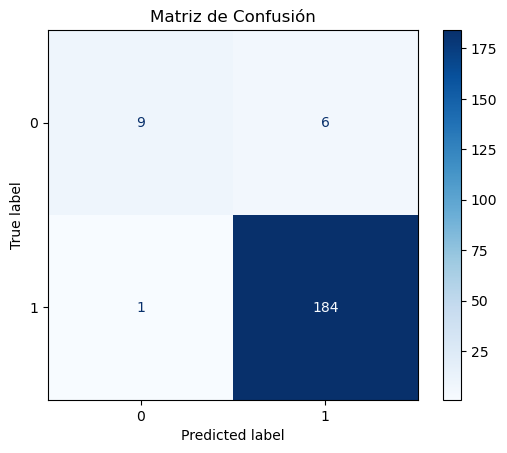

In [44]:
# Calcular la matriz de confusión con el nuevo umbral
cm = confusion_matrix(y_test, y_pred_prob)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

## Métricas

In [46]:
# Calcular predicciones para el conjunto de entrenamiento y prueba
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Obtener las probabilidades de predicción
y_train_proba = modelo.predict_proba(X_train)
y_test_proba = modelo.predict_proba(X_test)

umbral = 0.6
y_train_pred = (y_train_proba[:, 1] >= umbral)
y_test_pred = (y_test_proba[:, 1] >= umbral)

In [47]:
# Cálculo de métricas
metrics = {
    "train": {
        "Accurancy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1_score": f1_score(y_train, y_train_pred)
    },
    "test": {
        "Accurancy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1_score": f1_score(y_test, y_test_pred)
    }
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics)

In [48]:
df_metrics.round(2).T

,Accurancy,Precision,Recall,F1_score
train,0.95,0.95,1.00,0.97
test,0.96,0.97,0.99,0.98


Este modelo ha salido con muy buenas métricas

In [49]:
y.value_counts()
# Es una variable desbalanceada, podría meter sesgos en el modelo

aprobado
1    898
0    102
Name: count, dtype: int64

In [50]:
y.value_counts(normalize=True).round(2)

aprobado
1    0.9
0    0.1
Name: proportion, dtype: float64

In [51]:
# Cálculo de métricas con desbalanceo
metrics_weighted = {
    "train": {
        "Accurancy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1_score": f1_score(y_train, y_train_pred, average="weighted")
    },
    "test": {
        "Accurancy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1_score": f1_score(y_test, y_test_pred, average="weighted")
    }
}

# Mostrar métricas en un DataFrame
df_metrics_weighted = pd.DataFrame(metrics_weighted)

In [52]:
df_metrics_weighted.round(2).T

,Accurancy,Precision,Recall,F1_score
train,0.95,0.95,0.95,0.94
test,0.96,0.96,0.96,0.96


No parece mejorar el modelo

## Importancia de características

In [53]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_[0]})
coef_df= coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

In [54]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
5,nota_final,7.723210
0,horas_estudio_semanal,1.805406
1,nota_anterior,1.448706
2,tasa_asistencia,0.791236
14,horario_estudio_preferido_Unknown,0.514397
6,nivel_dificultad_Difícil,-0.443367
12,horario_estudio_preferido_Noche,-0.367584
7,nivel_dificultad_Fácil,0.338442
17,estilo_aprendizaje_Lectura/Escritura,0.280630
3,horas_sueno,0.266489


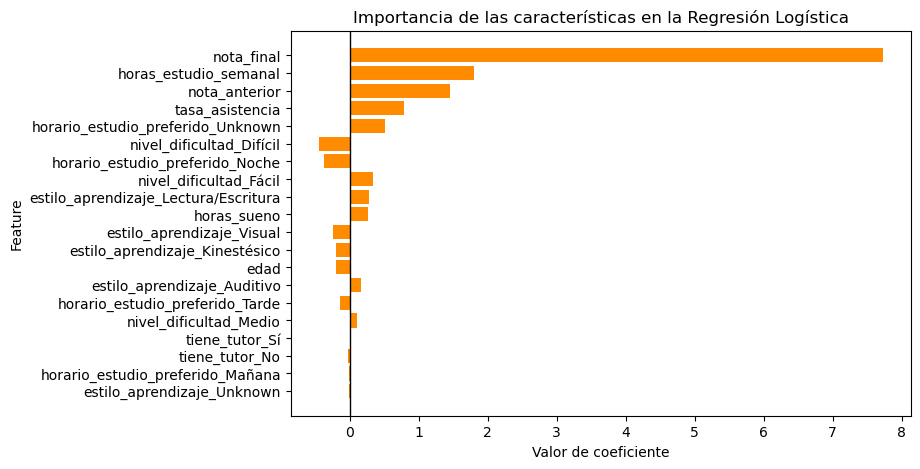

In [55]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='darkorange')
plt.xlabel("Valor de coeficiente")
plt.ylabel("Feature")
plt.title("Importancia de las características en la Regresión Logística")
plt.axvline(0, color='black', linewidth=1) # Línea en el 0 para referencia
plt.gca().invert_yaxis() # Invertir eje para que la más importante esté arriba
plt.show()

## Entrenamiento final

In [56]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
modelo_final = LogisticRegression(penalty='l2', C=1.0, max_iter=200, n_jobs=-1)
modelo_final.fit(X,y)

# Guardar el mnodelo entrenado para producción
joblib.dump(modelo_final, './modelos/modelo_clasificacion.pkl')

['./modelos/modelo_clasificacion.pkl']

------------------------------------------------------------------------------------------------------------------------------
Para terminar, vamos a explorar diferentes combinaciones en el modelo de regresión logística
para ver si podemos mejorar las métricas

In [62]:
# Definir modelos de regresión logística con regularización
modelos = {
    "Logistic (L2 - Ridge)": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Logistic (L1 - Lasso)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear'),
    "Logistic (ElasticNet)": LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga')
}

# Inicializar diccionario para métricas
metrics_result = {}

# Entrenar y evaluar cada modelo
for name, model in modelos.items():
    modelo.fit(X_train, y_train) # Entrenar el modelo
    
    # Predecir en entrenamiento y prueba
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    # Calcular métricas ponderadas
    metrics_result[name] = {
        "Train Accurancy": accuracy_score(y_train, y_train_pred),
        "Train Precision Weighted": precision_score(y_train, y_train_pred, average="weighted"),
        "Train Recall Weighted": recall_score(y_train, y_train_pred, average="weighted"),
        "Train F1_score Weighted": f1_score(y_train, y_train_pred, average="weighted"),
        "Test Accurancy": accuracy_score(y_test, y_test_pred),
        "Test Precision Weighted": precision_score(y_test, y_test_pred, average="weighted"),
        "Test Recall Weighted": recall_score(y_test, y_test_pred, average="weighted"),
        "Test F1_score Weighted": f1_score(y_test, y_test_pred, average="weighted")
    }
    
# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_result)

In [63]:
df_metrics.round(2).T

,Train Accurancy,Train Precision Weighted,Train Recall Weighted,Train F1_score Weighted,Test Accurancy,Test Precision Weighted,Test Recall Weighted,Test F1_score Weighted
Logistic (L2 - Ridge),0.92,0.93,0.92,0.9,0.96,0.96,0.96,0.95
Logistic (L1 - Lasso),0.92,0.93,0.92,0.9,0.96,0.96,0.96,0.95
Logistic (ElasticNet),0.92,0.93,0.92,0.9,0.96,0.96,0.96,0.95
